In [143]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats

In [100]:
file = '/Users/blakehummer/Desktop/fitness_class_2212.csv'
data = pd.read_csv(file)

In [150]:
data.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wed,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


In [102]:
data.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [103]:
data.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [104]:
for col in data.columns:
    print(data[col].value_counts())

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: booking_id, Length: 1500, dtype: int64
8      99
7      93
6      92
9      85
5      80
       ..
60      1
90      1
105     1
62      1
69      1
Name: months_as_member, Length: 72, dtype: int64
78.28    5
84.64    4
75.63    4
76.18    3
69.00    3
        ..
65.01    1
73.09    1
86.22    1
79.44    1
94.39    1
Name: weight, Length: 1241, dtype: int64
10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64
Fri          279
Thu       

In [151]:
data['booking_id'] = data['booking_id'].astype('category')

In [106]:
data['weight'].fillna(data['weight'].mean(), inplace=True)
data['weight'].isnull().sum()

0

In [107]:
data['days_before'] = data['days_before'].str.replace(' days', '').astype('int64')
data['days_before'].value_counts()

10    299
2     200
8     195
12    181
14    175
4     157
6      73
7      39
3      32
5      31
13     26
11     26
9      24
15     24
1      10
16      3
17      3
20      1
29      1
Name: days_before, dtype: int64

In [108]:
data['day_of_week'] = data['day_of_week'].str.replace('.', '', regex=False)
data['day_of_week'] = data['day_of_week'].str.replace('Wednesday', 'Wed')
data['day_of_week'] = data['day_of_week'].str.replace('Monday', 'Mon')
data['day_of_week'] = data['day_of_week'].astype('category')
data['day_of_week'].value_counts()

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

In [109]:
data['time'] = pd.Categorical(data['time'], categories = ['AM', 'PM'], ordered=True)

In [110]:
data['category'] = data['category'].str.replace('-', 'unknown').astype('category')
data['category'].value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64

In [152]:
data['attended'] = data['attended'].astype('category')
data.dtypes

booking_id          category
months_as_member       int64
weight               float64
days_before            int64
day_of_week         category
time                category
category            category
attended            category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

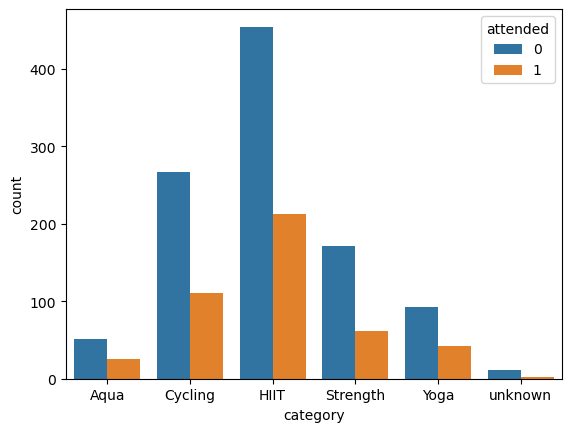

In [121]:
sns.countplot(data=data, x='category', hue = 'attended')

<AxesSubplot:xlabel='months_as_member', ylabel='Count'>

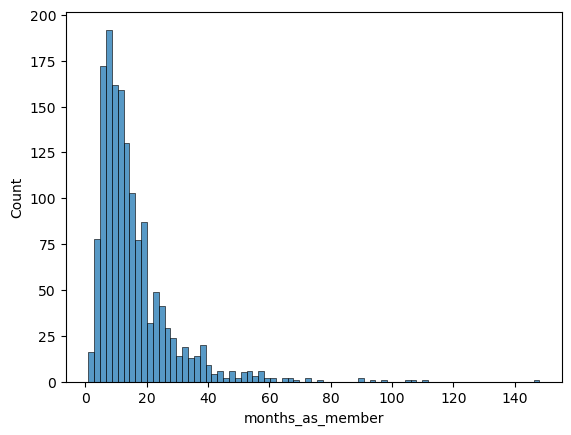

In [122]:
sns.histplot(data=data, x="months_as_member")

<AxesSubplot:xlabel='attended', ylabel='months_as_member'>

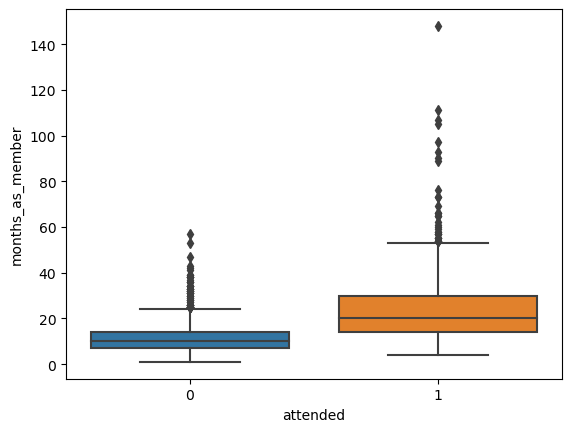

In [127]:
sns.boxplot(data=data, x='attended', y='months_as_member')

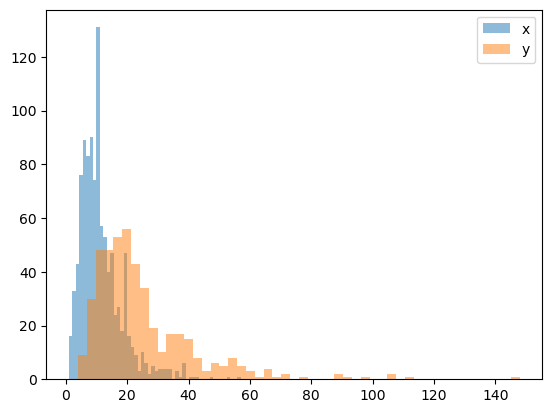

In [148]:
plt.pyplot.hist(d_group0, bins=50, alpha=0.5, label='x')
plt.pyplot.hist(d_group1, bins=50, alpha=0.5, label='y')
plt.pyplot.legend(loc='upper right')

In [146]:
d_group0 = data[data['attended'] == 0]['months_as_member']
d_group1 = data[data['attended'] == 1]['months_as_member']
stats.kruskal(d_group0, d_group1)

KruskalResult(statistic=395.24440529633216, pvalue=5.972871195461503e-88)

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [155]:
X = data[['months_as_member', 'weight', 'days_before', 'day_of_week', 'time', 'category']]
y = data['attended']

In [159]:
X.head()

,months_as_member,weight,days_before,day_of_week,time,category
0,17,79.56,8,Wed,PM,Strength
1,10,79.01,2,Mon,AM,HIIT
2,16,74.53,14,Sun,AM,Strength
3,5,86.12,10,Fri,AM,Cycling
4,15,69.29,8,Thu,AM,HIIT


In [158]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: attended, dtype: category
Categories (2, int64): [0, 1]

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [163]:
DT_model = DecisionTreeClassifier()